# Certamen de Simulación Estocástica - Pregunta 3
- Diego Astaburuaga

**III.** En esta pregunta se busca simular funciones de $L^2(\Omega)$. Para esto, recordamos que una función $f(t)\in L^2(\Omega)$ se puede escribir mediante una secuencia de bases ortogonales $\{\phi_i\}_{i=0}^\infty$ y una secuencia de números reales $\{\kappa_i\}_{i=0}^\infty$ como

$$
f(t):=f(t,\{\kappa_i\}_{i=0}^\infty)=\sum_{i=0}^\infty\kappa_i\phi_i(t)
$$

Considernando la secuencia de variables aleatorias independientes $\{S_k\}_{k=0}^\infty$ donde $S_k$ proviene de una distribución $Beta(1-\alpha,\theta +\alpha k)$. Se puede demostrar que el proceso $W_k=S_k\Pi_{i=0}^{k-1}(1-S_i)$ satisface que $W_k>0$ para todo número $k$ y que además $\sum_{k=0}^\infty W_k=1$. Realice las simulaciones:

## a) Simular la secuencia $W_k$ para distintos valores de $\alpha$ y $\theta$. Describa lo observado y fundamente con gráficos apropiados.

Ideas:

- Entender $W_k$ como una serie de tiempo para comparar entre distintos parameters.
    - Trabajar $W_k$ como datos y calcular su varianza y gráficarla versus los parametros.
    - Entender si existe tendencia en $W_k$ para los distintos parametros (considerar log(y)=x+\epsilon).

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [2]:
# Define a function to simulate an array of S_k values
def simulate_Sk(n_max, alpha, theta):
    """
    Simulate an array of S_k values of size n_max based on given specifications.

    Args:
        n_max (int): Size of the array.
        alpha (float): Alpha parameter of the beta distribution.
        theta (float): Theta parameter of the beta distribution.

    Returns:
        numpy.ndarray: Array of simulated S_k values.
    """
    # Use list comprehension to generate S_k values for each k in the range
    Sk = np.array([beta(1 - alpha, theta + alpha * k).rvs(1) for k in range(n_max)])
    return Sk

# Define a function to simulate an array of W_k values
def simulate_Wk(n_max, alpha, theta):
    """
    Simulate an array of W_k values of size n_max based on given specifications.

    Args:
        n_max (int): Size of the array.
        alpha (float): Alpha parameter of the beta distribution.
        theta (float): Theta parameter of the beta distribution.

    Returns:
        numpy.ndarray: Array of simulated W_k values.
    """
    # Simulate an array of S_k values
    Sk = simulate_Sk(n_max, alpha, theta)

    # Use list comprehension to calculate W_k values for each k in the range
    Wk = np.array([Sk[k] * np.product(1 - Sk[:k]) for k in range(n_max)])
    return Wk

Note que en $Beta(1-\alpha,\theta +\alpha k)$, existe la condición de que las entradas de la distribución deben ser no negativos para todo $k\in \mathbb{N}$, por lo tanto $\alpha\in(0,1)$ y $\theta>0$

Notese que para varios posibles valores de $\alpha$ y $\theta$ se debería verificar computacionalmente que la suma de la sucesión $W_k$ efectivamente da 1, como son terminos positivos y estamos truncando la sucesión, esta debería ser cercana 1, en efecto:

In [3]:
# Define the parameters
n_max = 10_000
itr = 5  # Number of iterations
tol = 0.1 

# Create grids of alpha and theta values for iteration
alpha_grid = np.linspace(0.0001, 1-0.0001, itr)
theta_grid = np.linspace(1, 10, itr)

# Initialize a variable to count the number of times sum(Wk) < tol
amount_over_tol = 0

# Nested loops to iterate through alpha and theta values
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simulate Wk values for the current alpha and theta
        Wk = simulate_Wk(n_max, alpha, theta)
        
        # Check if the sum of Wk values is less than tol
        if np.abs(np.sum(Wk)-1) > tol:
            amount_over_tol += 1

# Calculate the estimated probability P(sum(W_k) < tol)
estimated_probability = amount_over_tol / (itr**2)

# Print the result
print(f'Estimation of P(|1-sum(W_k)| > {tol}) is {estimated_probability}')


Estimation of P(|1-sum(W_k)| > 0.1) is 0.24


experimentando con distintos largos de la cadena $W_k$ se deduce que para tener una cadena significativa en el sentido que todos los valores sumen 1 aproximadamente, hay que trabajar con valores altos. En lo siguiente se puede deducir que según los valores de $\theta$ y $\alpha$, se requieren más o menos valores para alcanzar la tolerancia.

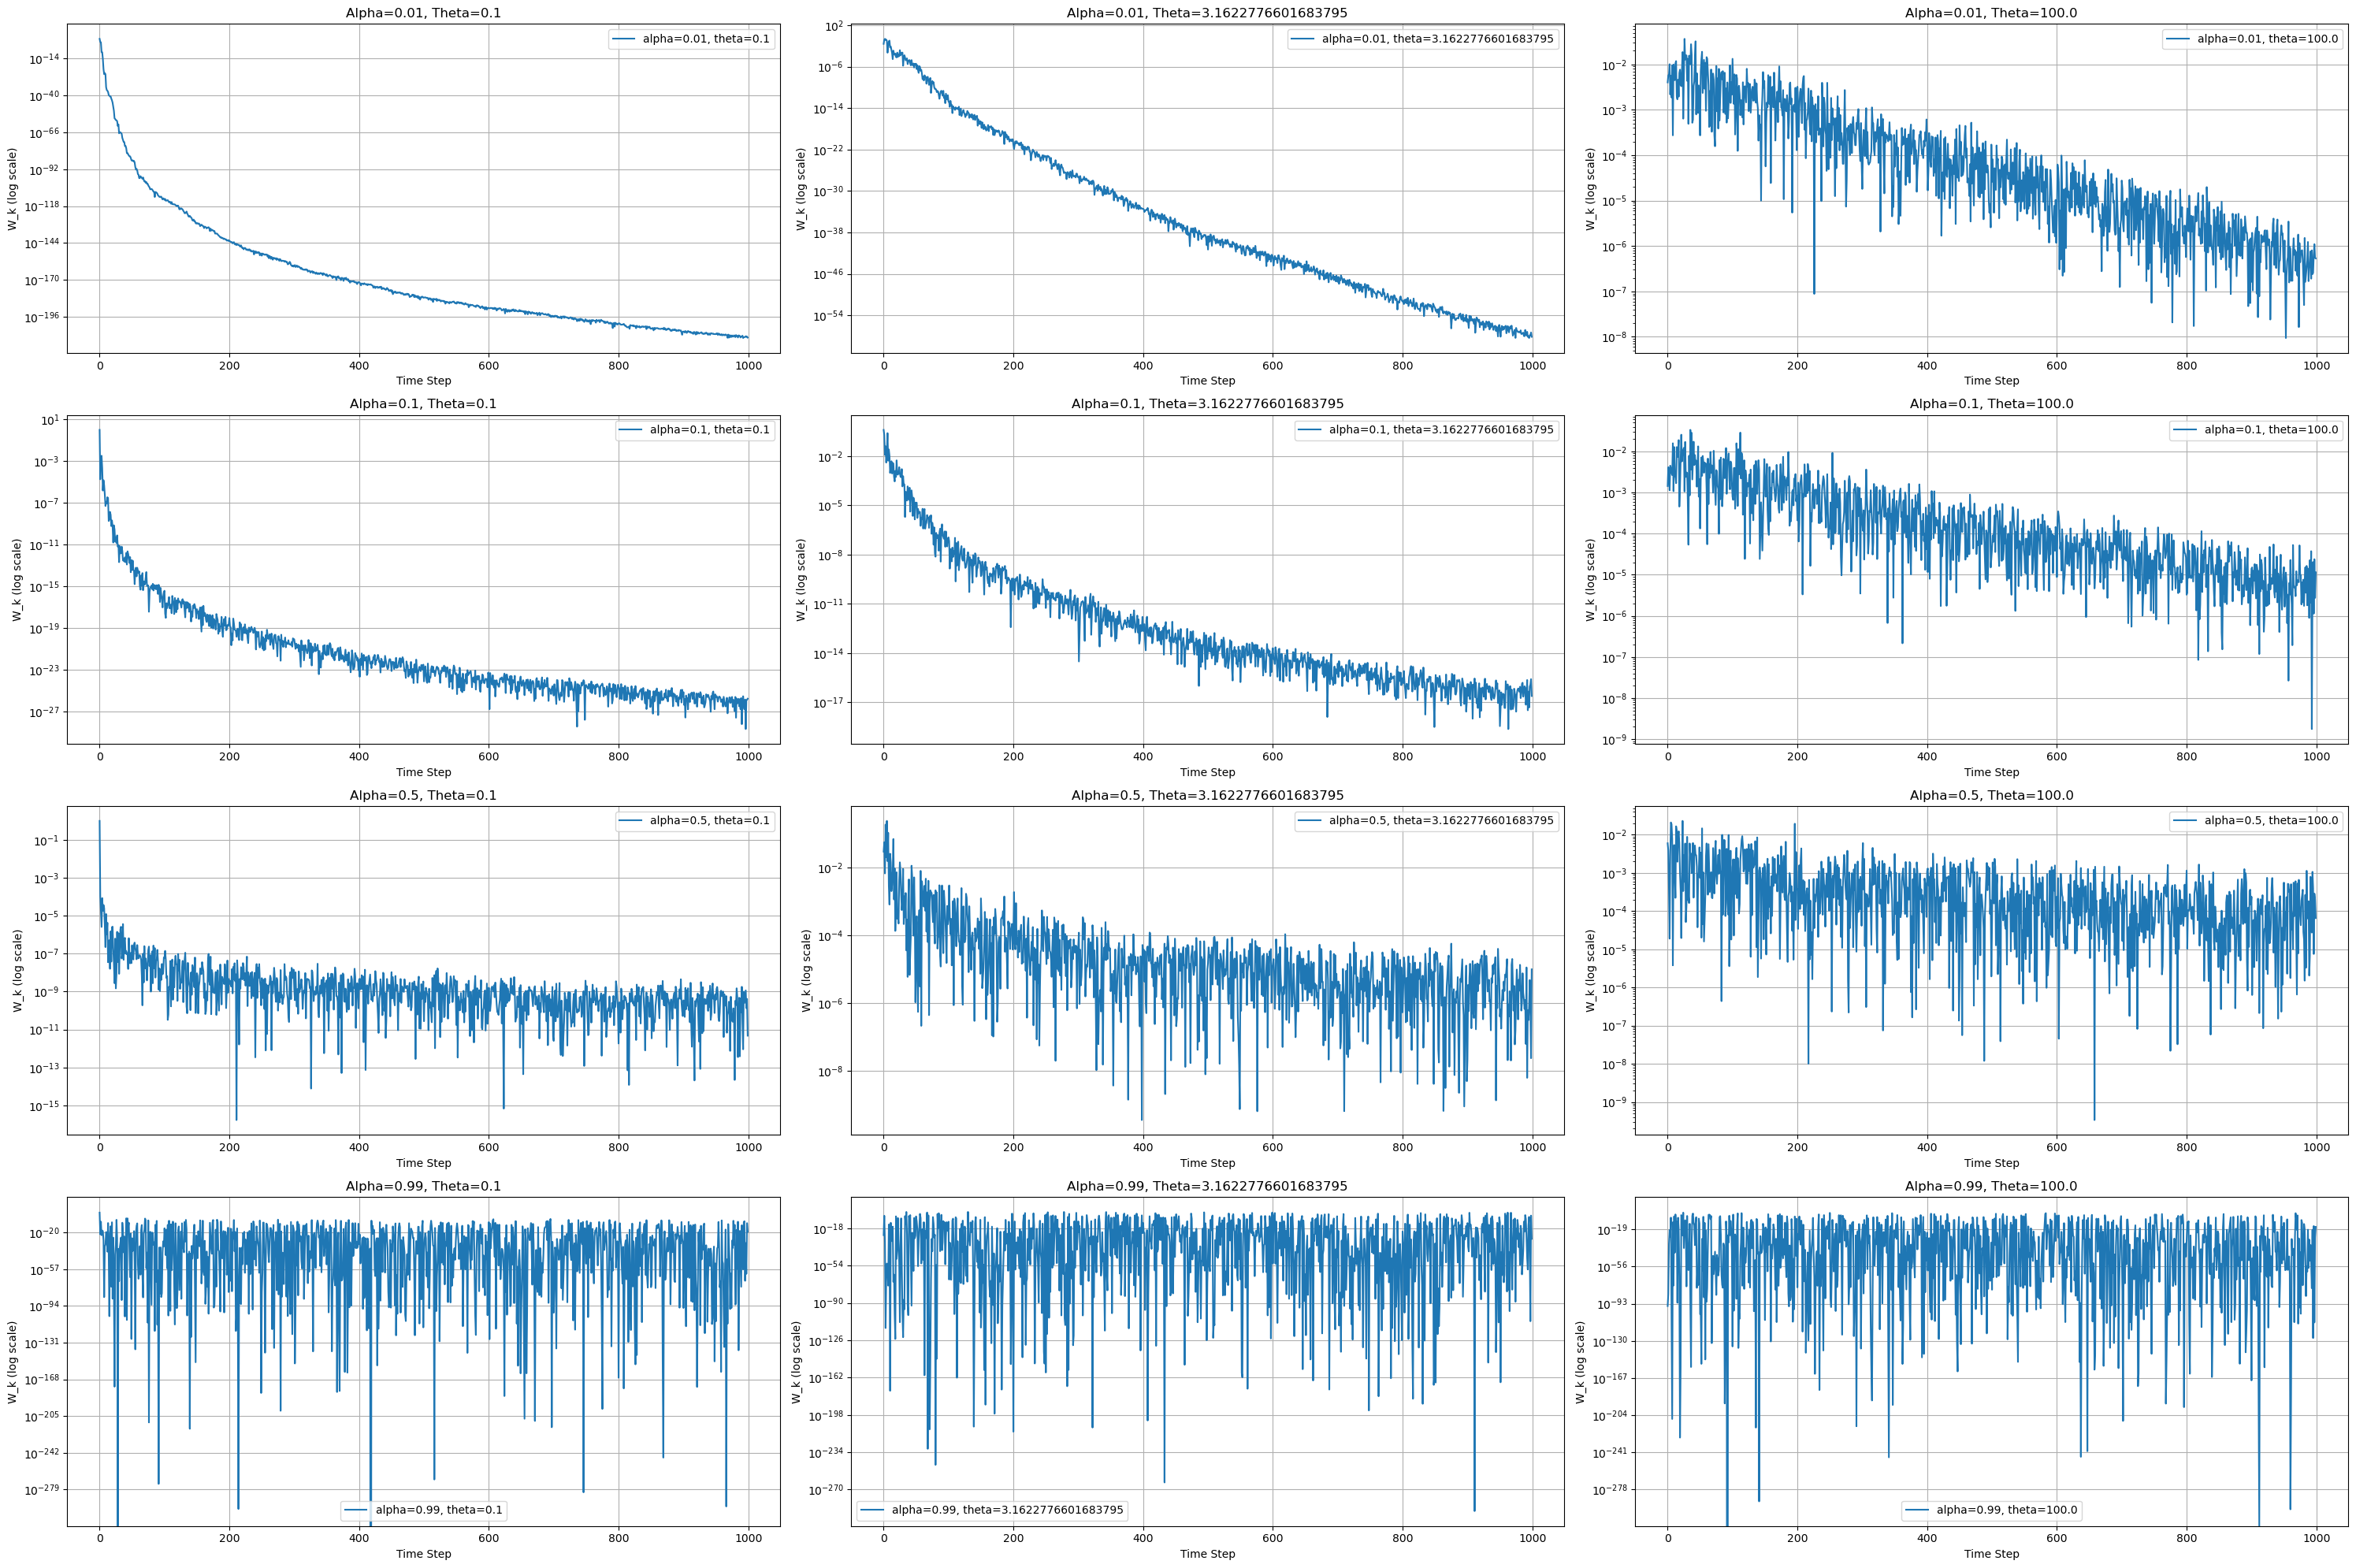

In [4]:
# Definir parámetros y configuración
n_max = 1000  # Tamaño de la serie de tiempo
k = n_max
alpha_grid = [0.01, 0.1, 0.5, 0.99]  # Valores de alpha
theta_grid = np.logspace(-1, 2, 3 )  # Valores de theta

num_plots = len(alpha_grid) * len(theta_grid)  # Número total de gráficos

# Crear subplots para cada combinación de alpha y theta
fig, axes = plt.subplots(len(alpha_grid), len(theta_grid), figsize=(30, 20))

# Iterar a través de los valores de alpha y theta
for i, alpha in enumerate(alpha_grid):
    for j, theta in enumerate(theta_grid):
        # Simular la serie de tiempo utilizando simulate_Wk
        Wk = simulate_Wk(n_max, alpha, theta)

        Wk = Wk[-k:]
        
        # Graficar la serie de tiempo en el subplot correspondiente
        ax = axes[i, j]
        ax.plot(np.arange(k), Wk, label=f'alpha={alpha}, theta={theta}')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('W_k (log scale)')
        ax.set_yscale('log')  # Establecer escala logarítmica en el eje Y
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        ax.grid(True)
        ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Busquemos entender la distribución $Beta$ para conocer que parámetros de $\alpha$ y $\theta$ son adecuados.

> Recordatorio, realmente todo lo que tiene que ver con la función Beta de por si no es importante.

Para esto note que su densidad de probabilidad es
$$
f(x,a,b)=\frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)}
$$

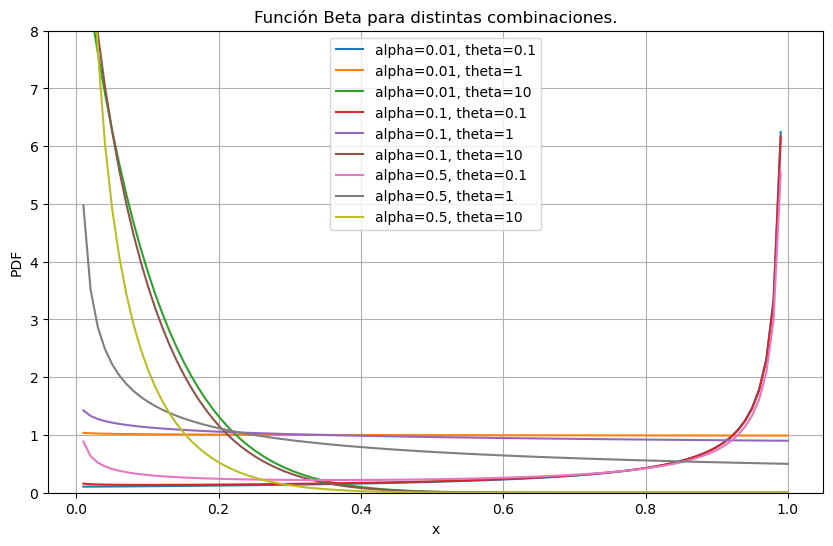

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

plt.figure(figsize=(10, 6))

# Valores de alpha y beta que quieres graficar
alphas = [0.01, 0.1, 0.5]
thetas = [0.1, 1, 10]

# Rango de valores para x (0 a 1)
x = np.linspace(0, 1, 100)

k = 0

# Crear un gráfico para cada combinación de parámetros alpha y beta
for alpha in alphas:
    for theta in thetas:
        y = beta.pdf(x, 1-alpha, theta + k*alpha)
        plt.plot(x, y, label=f'alpha={alpha}, theta={theta}')

# Configuración del gráfico
plt.title('Función Beta para distintas combinaciones.')
plt.xlabel('x')
plt.ylabel('PDF')
plt.ylim(0,8)
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

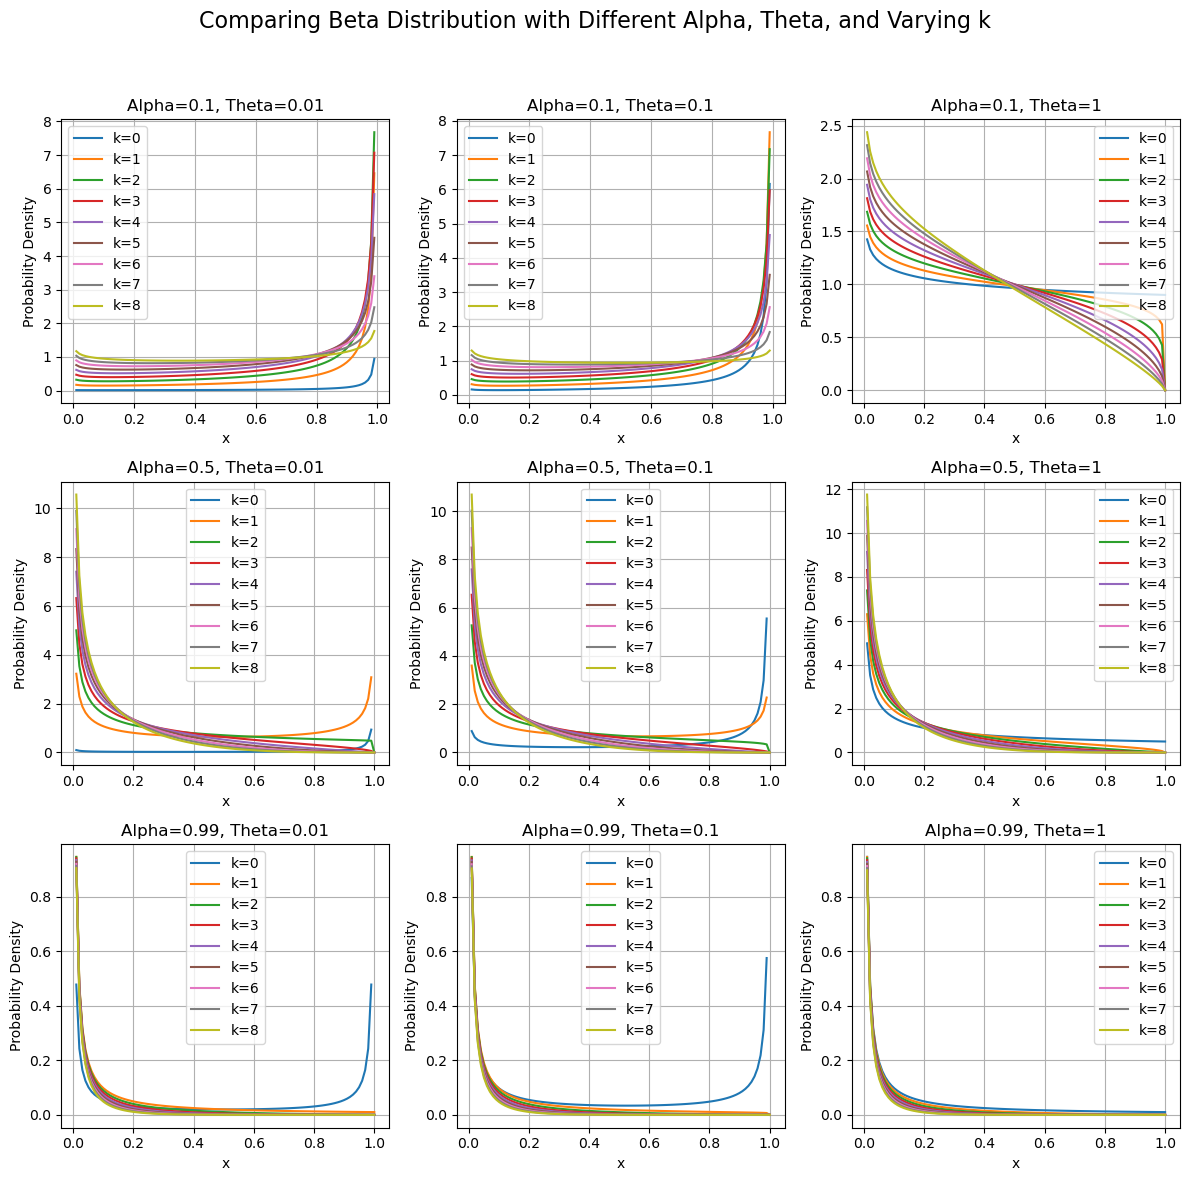

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the range of values for x
x = np.linspace(0, 1, 100)

# Different values of alpha and theta
alpha_values = [0.1, 0.5, 0.99]
theta_values = [0.01, 0.1, 1]

k_values = range(9)

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Comparing Beta Distribution with Different Alpha, Theta, and Varying k', fontsize=16)

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        alpha = alpha_values[i]
        theta = theta_values[j]
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        
        for k in k_values:
            # Calculate the beta distribution for the given alpha, theta, and different k values
            y = beta.pdf(x, 1 - alpha, theta + k * alpha)
            
            # Plot the function with the corresponding label
            ax.plot(x, y, label=f'k={k}')
        
        ax.set_xlabel('x')
        ax.set_ylabel('Probability Density')
        ax.grid(True)
        ax.legend()

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


> Arreglar graficos para que sean interpretativos con respecto a los análisis de más abajo.
> Cuando gráfiques debes ser ordenado para que lo de abajo tenga sentido también.

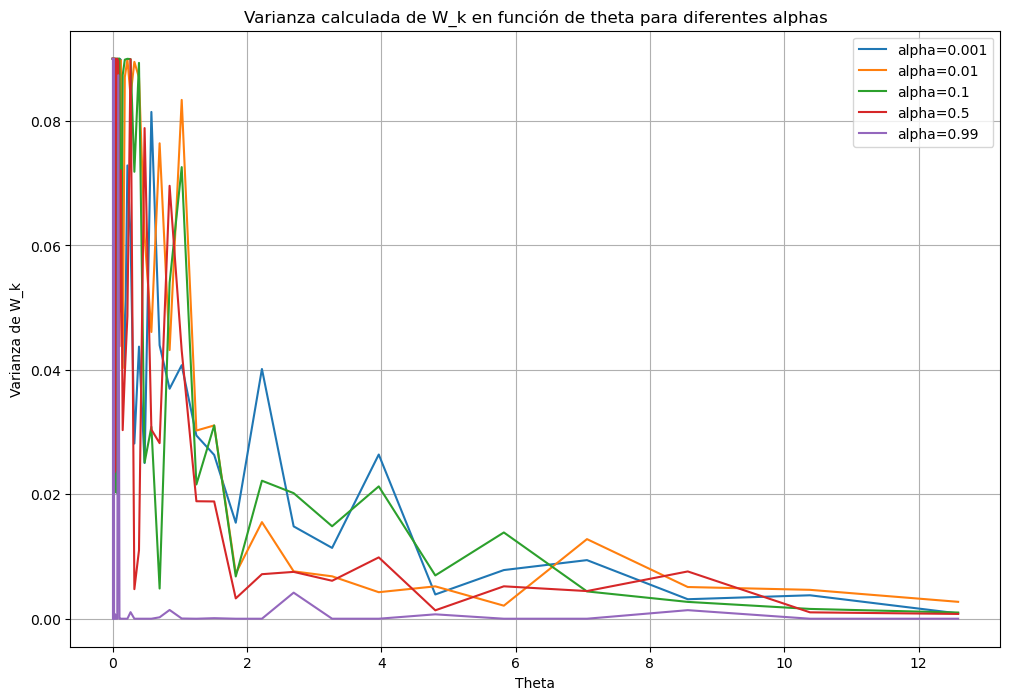

In [7]:
theta_values = np.logspace(-3, 1.1, 50)
n_max = 10

# Valores de alpha a considerar
alphas = [0.001, 0.01, 0.1, 0.5, 0.99]

# Lista para almacenar las varianzas para cada alpha
variances = []

# Simular cadenas de W_k para valores variados de theta y alpha
plt.figure(figsize=(12, 8))

for alpha in alphas:
    Wk_chains = [simulate_Wk(n_max, alpha, theta) for theta in theta_values]
    Wk_variances = [np.var(Wk) for Wk in Wk_chains]
    variances.append(Wk_variances)
    plt.plot(theta_values, Wk_variances, label=f'alpha={alpha}')

plt.title(f'Varianza calculada de W_k en función de theta para diferentes alphas')
plt.xlabel('Theta')
plt.ylabel('Varianza de W_k')
plt.legend()
plt.grid()
plt.show()

Se comenta que para $\theta$ grande, la varianza de la serie es baja, mientras que para $\theta$ bajo, está es alta. Respecto al valor de $\alpha$, para $\alpha$ cercano a $1$ la varianza cae bruscamente mientras que para el resto de casos, parecen tener el mismo comportamiento.

## b) Usando la representación para la funciones $L^2$, genere un código que pueda generar funciones que satisfacen que:

### 1) Sean periódicas y pares en $L^2([-1,1])$.

Para esta parte considere la base ortonormal de $L^2([0,L])$ dada por:

$$
S = \left\{\sqrt{\frac{2}{L}}\cos\left(\frac{k\pi}{L}x\right)\right\}_{k=0}^\infty
$$

que se puede escribir en este caso de $L^2([-1,1])$ como:

$$
S = \left\{cos\left(\frac{k\pi}{2}(x+1)\right)\right\}_{k=0}^\infty
$$

In [8]:
def periodic_base(k, x):
    """
    Calculate the value of the periodic base function: cos(k * π * (x+1) / 2).

    Args:
        k (float, array-like): The 'k' parameter (scalar or array).
        x (float, array-like): The 'x' value(s) at which to evaluate the function (scalar, list, or array).

    Returns:
        array-like: The result(s) of cos(k * π * (x+1) / 2) as a matrix.
    """
    # Ensure k and x are arrays for element-wise operation
    k = np.array(k)
    x = np.array(x)

    # Calculate the result as a matrix using the outer product
    return np.cos(np.outer(k, np.pi * (x+1) / 2))

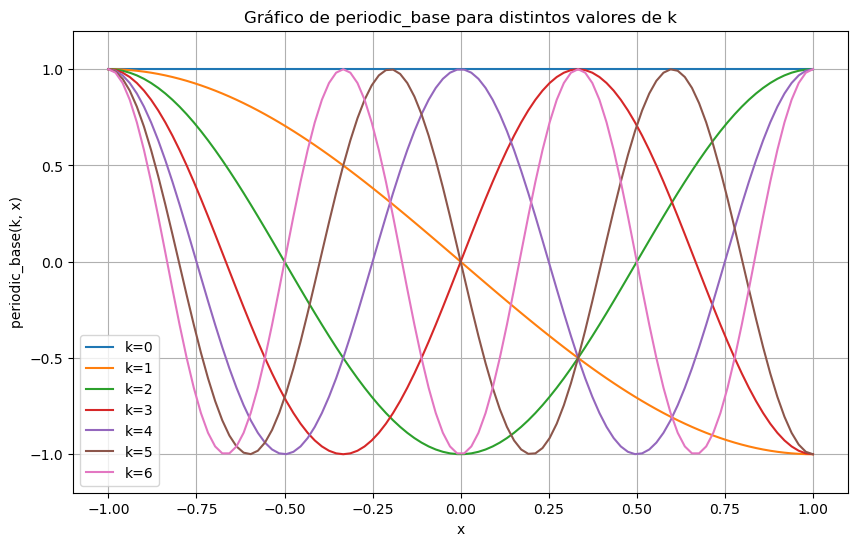

In [9]:
# Definir el rango de x
x = np.linspace(-1, 1, 100)

# Valores de k en el rango de 0 a 6
k_values = np.arange(0, 7)

# Crear subplots para cada valor de k
plt.figure(figsize=(10, 6))

for k in k_values:
    # Calcular la función periódica para el valor actual de k
    periodic_func = periodic_base(k, x)
    
    # Seleccionar la primera fila de periodic_func para trazarla
    periodic_func = periodic_func[0]
    
    # Graficar la función con un nombre específico para la leyenda
    plt.plot(x, periodic_func, label=f'k={k}')

# Configurar etiquetas y título
plt.xlabel('x')
plt.ylabel('periodic_base(k, x)')
plt.title('Gráfico de periodic_base para distintos valores de k')
plt.grid(True)
plt.legend()  # Mostrar leyenda con nombres de k
plt.ylim(-1.2, 1.2)  # Establecer límites en el eje y

# Mostrar el gráfico
plt.show()


functions corresponde a una matriz con todas las evaluaciones necesarias para los $k=0,1,...,9$ en los puntos $x\in (-5,5)$ de forma:
$$
\begin{pmatrix}
(k=0, x=0) & (k=0,x=1)  & (k=0,x=2)\\
(k=1, x=0) & (k=1,x=1)  & (k=1,x=2)\\
(k=2, x=0) & (k=2,x=1)  & (k=2,x=2)
\end{pmatrix}
$$

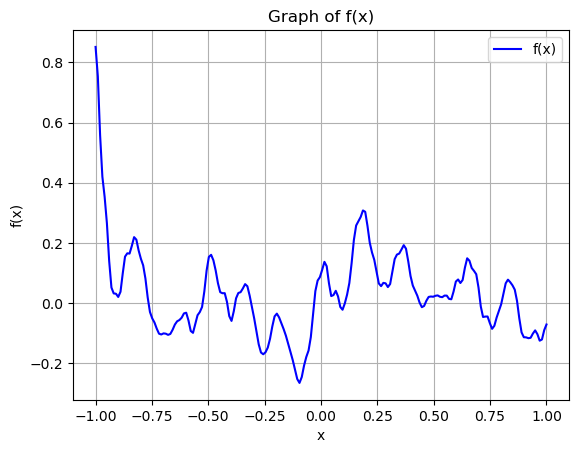

In [10]:
# Define the range for x values
x_min = -1
x_max = 1

# Define the maximum value for k and the size of the array
k_max = 100
n_max = 200

# Define alpha and theta parameters
alpha = 0.5
theta = 10

# Create an array of x values
x = np.linspace(x_min, x_max, n_max)

# Simulate Wk values
Wk = simulate_Wk(k_max, alpha, theta)

# Generate periodic base functions for different values of k
functions = periodic_base(np.arange(0, k_max), x)

# Calculate the function f by taking the dot product of functions and Wk
f = functions.T @ Wk

# Create the plot
plt.plot(x, f, label='f(x)', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.grid(True)
plt.legend()
plt.show()


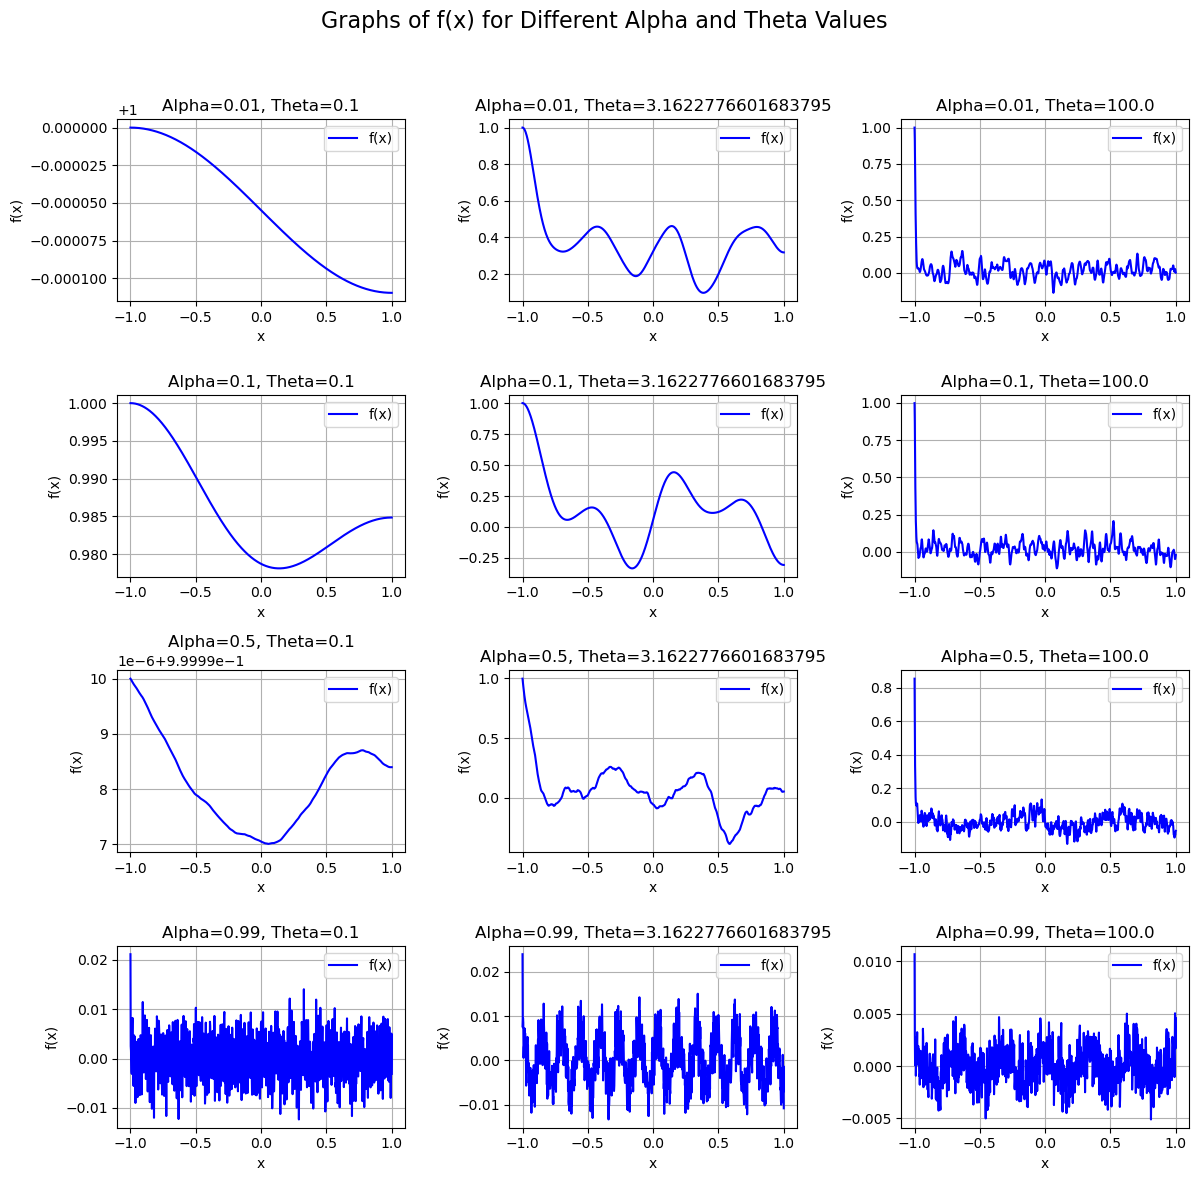

In [11]:
# Define the range for x values
x_min = -1
x_max = 1

# Define the maximum value for k and the size of the array
k_max = 1000
n_max = 1000

# Define alpha and theta parameters
alpha_values = [0.01, 0.1, 0.5, 0.99]
theta_values = np.logspace(-1, 2, 3 )

# Create an array of x values
x = np.linspace(x_min, x_max, n_max)

# Create a 3x3 grid of plots
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
fig.suptitle('Graphs of f(x) for Different Alpha and Theta Values', fontsize=16)

# Iterate through alpha and theta values
for i, alpha in enumerate(alpha_values):
    for j, theta in enumerate(theta_values):
        ax = axes[i, j]
        ax.set_title(f'Alpha={alpha}, Theta={theta}')
        
        # Simulate Wk values
        Wk = simulate_Wk(k_max, alpha, theta)
        
        # Generate periodic base functions for different values of k
        functions = periodic_base(np.arange(0, k_max), x)
        
        # Calculate the function f by taking the dot product of functions and Wk
        f = functions.T @ Wk
        
        # Plot the function with the corresponding label
        ax.plot(x, f, label='f(x)', color='blue')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True)
        ax.legend()

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


> Puede ser una idea tener en cuenta el uso de linspace aleatorios para capar mejor las partes importantes de las funciones.

### 2) Sean estríctamente crecientes en $L^2([0,1])$.

>  Simula primero desde 3, luego con funciones estrictamente positivas, las integras y tienes funciones crecientes.

### 3) Sean positivas e integren 1 en $L^2([0,1])$

> No existe una base que cumpla estas carácteristicas, dado que si dos funciones de la base son positivas, entonces su producto y por ende su integral es positiva.

**Obs 1:** En cada pregunta debe de realizar un experimento de simulación que muestre los efectos de $\alpha$ y $\theta$.

**Obs 2:** Considere agregar otras distribuciones si es necesario.
